**Redes neuronales CNN**
Train

In [0]:
import sys
import os
from matplotlib import pyplot
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator #para prepocesamiento 
from tensorflow.python.keras import optimizers #para optimizacion
from tensorflow.python.keras import Sequential #para red neuornal secuencial (capaz de la red en orden)
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation #capas
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D, Conv2D, AveragePooling2D #capas
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.optimizers import SGD


In [0]:
K.clear_session()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!ls /content/drive/

'My Drive'


In [0]:
#Rutas donde estan las imagenes de entranmiento y validación
data_training = '/content/drive/My Drive/Animales/data/training'
data_validation = '/content/drive/My Drive/Animales/data/validation'

**Parametros utilizados por la CNN**


In [0]:
#Parametros
epochs=20 #numero de veces que se itera 
height, width=100,100 #tamaño en el que se procesan las imagenes
channels_colors=3 #imagenes RGB
batch_size=32 #numero de imagenes que se procesan por cada pasos.
steps=1000 
validation_steps=200
filters_conv1=32 #numero de filtros que se aplica en cada convolución
filters_conv2=64
kernel_size_filter1=(3,3)
kernel_size_filter2=(2,2)
pool_s=(2,2)
clases=3 #cantidad de clases a clasificar
lr=0.0005 #tamaño del ajuste que hace la red neuronal para acercarse a la solucion optima

**Preprocesamiento de imagenes**


In [9]:
#pre procesamiento de imagenes
training_data_gen=ImageDataGenerator(
    rescale= 1./255, #valorees de pixeles entre 0 y 1 en vez de 0 a 255
    shear_range=0.3, #inclina imagenes
    zoom_range=0.3, #zoom a imagenes
    horizontal_flip=True #invierte imagenes
) 
validation_data_gen=ImageDataGenerator(
    rescale= 1./255, #valorees de pixeles entre 0 y 1 en vez de 0 a 255
) 

training_images=training_data_gen.flow_from_directory( 
    data_training,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical' #clasificacion categorica
)

validation_images=validation_data_gen.flow_from_directory(
    data_validation,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical' #clasificacion categorica
)
print(training_images.class_indices)
#images_training y images_validation contienen las imagenes para entrenar la red neuronal

Found 2435 images belonging to 3 classes.
Found 746 images belonging to 3 classes.
{'gato': 0, 'perico': 1, 'perro': 2}


**Creacion de la red neuronal convolucional (CNN)**

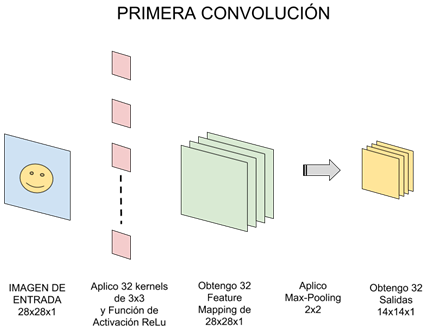
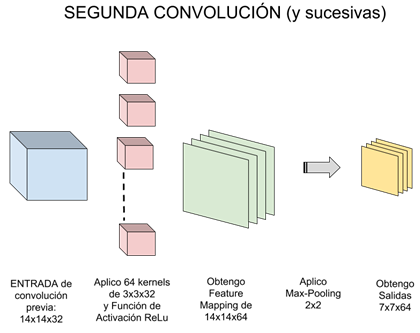


In [0]:
def getModel():
  cnn=Sequential() #capas apiladas

#PRIMERA CONVOLUCION
  cnn.add(Convolution2D(filters_conv1, kernel_size_filter1, padding='same', input_shape=(height, width,channels_colors), activation='relu')) #1era capa
  cnn.add(MaxPooling2D(pool_size=pool_s))
#SEGUNDA CONVOLUCION
  cnn.add(Convolution2D(filters_conv2, kernel_size_filter2, padding='same',activation='relu'))
  cnn.add(MaxPooling2D(pool_size=pool_s))

  #para empezar a clasificar
  cnn.add(Flatten())#como la imagen es profunda y pequeña se convierte a 1 dimension
  cnn.add(Dense(256,activation='relu')) #256 neuronas, todas las nuronas van a estar relacionadas con la capa anterior
  cnn.add(Dropout(0.5)) #activa de manera aleatoria el 50% de las 256 nueornas, asi la red no aprende de memoria

  cnn.add(Dense(clases,activation='softmax')) #determina con el porcentaje mas alto a que clase pertence
  ##se le aplica una función llamada Softmax que conecta contra la capa de salida final que tendrá la cantidad de 
  ##neuronas correspondientes con las clases que se están clasificando.
  
  return cnn

Metodos que permiten visualizar la exactitud y ..

In [0]:
# plot loss
def plotCrossEntropyLoss(history):
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
 
# plot accuracy
def plotClassificationAccuracy(history):
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
  

In [13]:
cnn = getModel()

#optimizacion de la red
cnn.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=lr), metrics=['accuracy']) #funcion de perdida es categorical_crossentropy y optimizador Adam

cnn.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               10240256  
_________________________________________

In [14]:
#entrenar la red
history = cnn.fit(training_images, steps_per_epoch=steps, epochs=epochs,validation_data=validation_images, validation_steps=validation_steps, use_multiprocessing=True)

Epoch 1/20
1000/1000 [==============================] - 870s 870ms/step - loss: 0.5735 - acc: 0.7113 - val_loss: 0.5886 - val_acc: 0.7192
Epoch 2/20
1000/1000 [==============================] - 212s 212ms/step - loss: 0.4023 - acc: 0.8180 - val_loss: 0.5982 - val_acc: 0.7502
Epoch 3/20
1000/1000 [==============================] - 208s 208ms/step - loss: 0.3140 - acc: 0.8631 - val_loss: 0.6419 - val_acc: 0.7633
Epoch 4/20
1000/1000 [==============================] - 205s 205ms/step - loss: 0.2479 - acc: 0.8970 - val_loss: 0.7612 - val_acc: 0.7535
Epoch 5/20
1000/1000 [==============================] - 203s 203ms/step - loss: 0.1942 - acc: 0.9208 - val_loss: 0.9795 - val_acc: 0.7431
Epoch 6/20
1000/1000 [==============================] - 204s 204ms/step - loss: 0.1530 - acc: 0.9398 - val_loss: 0.8555 - val_acc: 0.7617
Epoch 7/20
1000/1000 [==============================] - 202s 202ms/step - loss: 0.1390 - acc: 0.9477 - val_loss: 1.0063 - val_acc: 0.7582
Epoch 8/20
1000/1000 [============

Evaluacion de la CNN

In [15]:
# evaluacion
_, acc = cnn.evaluate_generator(validation_images, steps=len(validation_images), verbose=0)
print('> %.3f' % (acc * 100.0))

> 78.686


Guarda el modelo en archivo para poder realizar predicciones 

In [0]:
dir='/content/drive/My Drive/Animales/model/'
if not os.path.exists(dir):
    os.mkdir(dir)
cnn.save(dir+'model_acc60.h5') #estrucutra modelo
cnn.save_weights(dir+'weights_acc60.h5') #pesos de cada capa entrenada

In [0]:
plotCrossEntropyLoss(history)

In [0]:
plotClassificationAccuracy(history)